<a href="https://colab.research.google.com/github/MonicaAishwarya/a/blob/main/preeclamsia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()  # Click "Choose Files" and select your CSV
fname = next(iter(uploaded))  # gets the uploaded file name
print("Uploaded file:", fname)

import pandas as pd
data = pd.read_csv(fname)
data.head()



Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set.csv
Uploaded file: Maternal Health Risk Data Set.csv


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("Maternal Health Risk Data Set.csv")

# First few rows
print(data.head())

# Summary
print(data.info())
print(data['RiskLevel'].value_counts())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None
RiskLevel
low risk     406
m

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode RiskLevel
le = LabelEncoder()
data['RiskLevel'] = le.fit_transform(data['RiskLevel'])

print(le.classes_)  # to see mapping


['high risk' 'low risk' 'mid risk']


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.812807881773399
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        47
           1       0.86      0.76      0.81        80
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train XGBoost
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


XGBoost Accuracy: 0.8423645320197044
              precision    recall  f1-score   support

   high risk       0.85      0.87      0.86        47
    low risk       0.87      0.82      0.85        80
    mid risk       0.81      0.84      0.83        76

    accuracy                           0.84       203
   macro avg       0.84      0.85      0.85       203
weighted avg       0.84      0.84      0.84       203



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest CV
rf_scores = cross_val_score(RandomForestClassifier(random_state=42),
                            X, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", np.mean(rf_scores))

# XGBoost CV
xgb_scores = cross_val_score(XGBClassifier(use_label_encoder=False,
                                           eval_metric='mlogloss',
                                           random_state=42),
                             X, y, cv=5, scoring='accuracy')
print("XGBoost CV Accuracy:", np.mean(xgb_scores))


Random Forest CV Accuracy: 0.822538165146564


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:09:47] WARNING: /w

XGBoost CV Accuracy: 0.8136711700726723


✅ Step 1: Finalize Random Forest + Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search
rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,   # number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X, y)

print("Best Params:", rf_random.best_params_)
print("Best CV Accuracy:", rf_random.best_score_)


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_

Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV Accuracy: 0.8264790518460714


In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Best tuned Random Forest (from previous step)
best_rf = rf_random.best_estimator_

# XGBoost model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# Soft voting ensemble
ensemble = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', xgb)],
    voting='soft'
)

# Cross-validation to check performance
cv_scores = cross_val_score(ensemble, X, y, cv=5, scoring='accuracy')

print("Ensemble CV Accuracy:", np.mean(cv_scores))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:49] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ensemble CV Accuracy: 0.8176120567721797


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


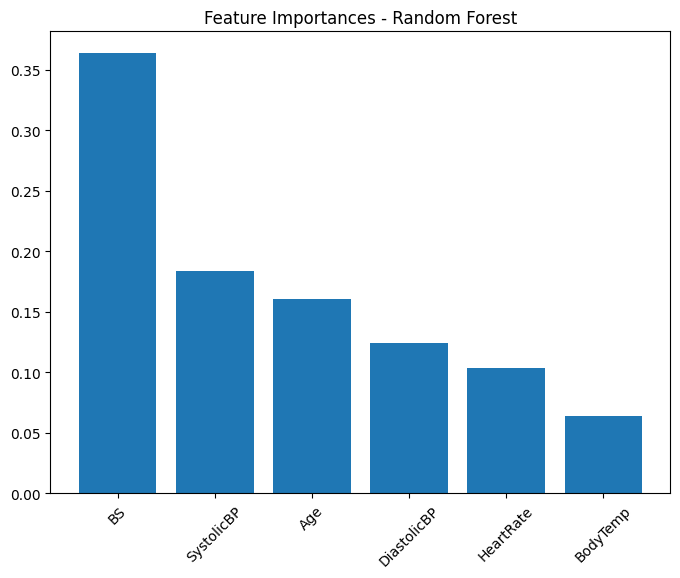

In [ ]:
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(8,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=45)
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:56] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


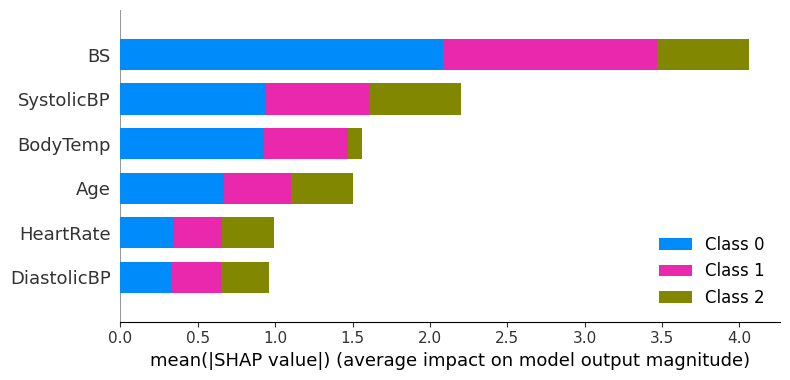

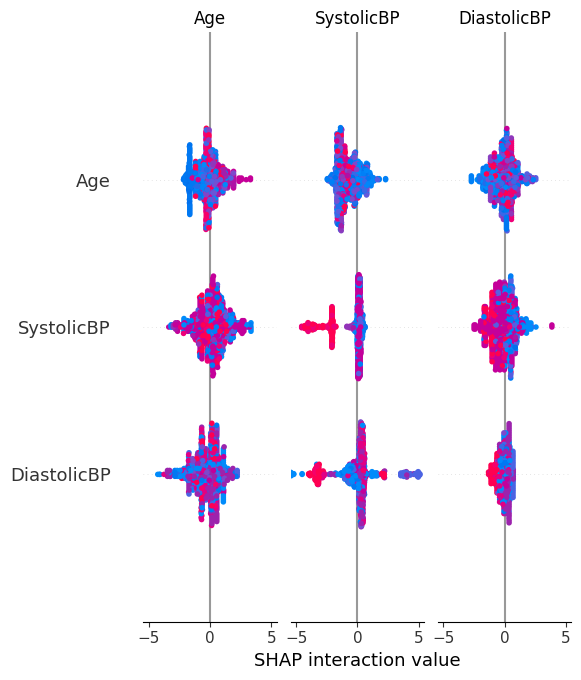

In [ ]:
import shap

# Train XGB on full data
xgb.fit(X, y)

# Explain predictions
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X)

# Global importance (bar plot)
shap.summary_plot(shap_values, X, plot_type="bar")

# Detailed beeswarm plot
shap.summary_plot(shap_values, X)


In [ ]:
import gradio as gr
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# =====================
# Load and preprocess data
# =====================
data = pd.read_csv("Maternal Health Risk Data Set.csv")

# Encode labels
le = LabelEncoder()
data['RiskLevel'] = le.fit_transform(data['RiskLevel'])

X = data.drop('RiskLevel', axis=1)
y = data['RiskLevel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (you can replace with tuned RandomForest or ensemble)
best_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    random_state=42
)
best_rf.fit(X_train, y_train)

# =====================
# Prediction function
# =====================
label_map = {0: "High Risk", 1: "Low Risk", 2: "Mid Risk"}

def predict(age, sbp, dbp, bs, temp, hr):
    input_data = pd.DataFrame([[age, sbp, dbp, bs, temp, hr]],
                              columns=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'])
    pred = best_rf.predict(input_data)[0]
    return label_map[pred]

# =====================
# Gradio UI
# =====================
with gr.Blocks() as demo:
    gr.Markdown("## 🌸 Maternal Health Risk Predictor")

    with gr.Row():
        with gr.Column():
            age = gr.Number(label="Age")
            sbp = gr.Number(label="SystolicBP")
            dbp = gr.Number(label="DiastolicBP")
            bs = gr.Number(label="Blood Sugar")
            temp = gr.Number(label="Body Temperature")
            hr = gr.Number(label="Heart Rate")
            btn = gr.Button("Predict Risk Level 🚀")

        with gr.Column():
            output = gr.Textbox(label="Prediction Result")

    btn.click(predict, inputs=[age, sbp, dbp, bs, temp, hr], outputs=output)

# Launch the app
demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://78cfa6bd812e48c55d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!git config --global user."Monica Aishwrya"
!git config --global user."kit27.am31@gmail.com"
